In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#split data into 80%training data and 20%test data  
from sklearn.model_selection import train_test_split
recipes=pd.read_csv("recipes.csv")
X=recipes.drop('cuisine',axis=1)
y=recipes['cuisine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)
X_train

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yams,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini
517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
clf_LogisticRegression = LogisticRegression(solver='sag',multi_class='multinomial')
clf_LogisticRegression.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='sag')

In [4]:
#Represent model's results for the test accuracy, precision, recall and f1 score
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,f1_score,accuracy_score)
from sklearn.model_selection import cross_val_score
y_pred_LogisticRegression_test=clf_LogisticRegression.predict(X_test)
print("Test Accuracy: %1.6f"%accuracy_score(y_test,y_pred_LogisticRegression_test))
print("Test Precision: %1.6f" % precision_score(y_test, y_pred_LogisticRegression_test, average="weighted"))
print("Test Recall: %1.6f" % recall_score(y_test, y_pred_LogisticRegression_test, average="weighted"))
print("Test F1: %1.6f\n" % f1_score(y_test, y_pred_LogisticRegression_test, average="weighted"))
cv_scores_LogisticRegression = cross_val_score(clf_LogisticRegression, X, y, cv=5)
print("Test cv_score: ",cv_scores_LogisticRegression.mean())

Test Accuracy: 0.765330
Test Precision: 0.769476
Test Recall: 0.765330
Test F1: 0.765550

Test cv_score:  0.7707686395936826


In [5]:
#Represent model's results for the training accuracy, precision, recall and f1 score
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,f1_score,accuracy_score)
y_pred_LogisticRegression_train=clf_LogisticRegression.predict(X_train)
print("Train Accuracy: %1.6f"%accuracy_score(y_train,y_pred_LogisticRegression_train))
print("Train Precision: %1.6f" % precision_score(y_train, y_pred_LogisticRegression_train, average="weighted"))
print("Train Recall: %1.6f" % recall_score(y_train, y_pred_LogisticRegression_train, average="weighted"))
print("Train F1: %1.6f\n" % f1_score(y_train, y_pred_LogisticRegression_train, average="weighted"))


Train Accuracy: 0.913518
Train Precision: 0.913559
Train Recall: 0.913518
Train F1: 0.913409



In [17]:
#Support Vector Classifier
from sklearn.svm import SVC
clf_SVC = SVC(decision_function_shape='ovo',class_weight='balanced',probability=True)
clf_SVC.fit(X_train, y_train)

SVC(class_weight='balanced', decision_function_shape='ovo', probability=True)

In [18]:
y_pred_SVC_test=clf_SVC.predict(X_test)
print("Test Accuracy: %1.6f"%accuracy_score(y_test,y_pred_SVC_test))
print("Test Precision: %1.6f" % precision_score(y_test, y_pred_SVC_test, average="weighted"))
print("Test Recall: %1.6f" % recall_score(y_test, y_pred_SVC_test, average="weighted"))
print("Test F1: %1.6f\n" % f1_score(y_test, y_pred_SVC_test, average="weighted"))
cv_scores_SVC = cross_val_score(clf_SVC, X, y, cv=5)
print("Test cv_score: ",cv_scores_SVC.mean())

Test Accuracy: 0.750000
Test Precision: 0.759249
Test Recall: 0.750000
Test F1: 0.751598

Test cv_score:  0.7655732774943752


In [19]:
y_pred_SVC_train=clf_SVC.predict(X_train)
print("Train Accuracy: %1.6f"%accuracy_score(y_train,y_pred_SVC_train))
print("Train Precision: %1.6f" % precision_score(y_train, y_pred_SVC_train, average="weighted"))
print("Train Recall: %1.6f" % recall_score(y_train, y_pred_SVC_train, average="weighted"))
print("Train F1: %1.6f\n" % f1_score(y_train, y_pred_SVC_train, average="weighted"))

Train Accuracy: 0.931228
Train Precision: 0.932281
Train Recall: 0.931228
Train F1: 0.931385



In [9]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier  
clf_KNN = KNeighborsClassifier()
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred_KNN_test=clf_KNN.predict(X_test)
print("Test Accuracy: %1.6f"%accuracy_score(y_test,y_pred_KNN_test))
print("Test Precision: %1.6f" % precision_score(y_test, y_pred_KNN_test, average="weighted"))
print("Test Recall: %1.6f" % recall_score(y_test, y_pred_KNN_test, average="weighted"))
print("Test F1: %1.6f\n" % f1_score(y_test, y_pred_KNN_test, average="weighted"))
cv_scores_KNN = cross_val_score(clf_KNN, X, y, cv=5)
print("Test cv_score: ",cv_scores_KNN.mean())

Test Accuracy: 0.626179
Test Precision: 0.665723
Test Recall: 0.626179
Test F1: 0.631456

Test cv_score:  0.6352662560424138


In [11]:
y_pred_KNN_train=clf_KNN.predict(X_train)
print("Train Accuracy: %1.6f"%accuracy_score(y_train,y_pred_KNN_train))
print("Train Precision: %1.6f" % precision_score(y_train, y_pred_KNN_train, average="weighted"))
print("Train Recall: %1.6f" % recall_score(y_train, y_pred_KNN_train, average="weighted"))
print("Train F1: %1.6f\n" % f1_score(y_train, y_pred_KNN_train, average="weighted"))

Train Accuracy: 0.758560
Train Precision: 0.774575
Train Recall: 0.758560
Train F1: 0.762105



In [12]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(max_depth=20)
clf_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [13]:
y_pred_RF_test=clf_RF.predict(X_test)
print("Test Accuracy: %1.6f"%accuracy_score(y_test,y_pred_RF_test))
print("Test Precision: %1.6f" % precision_score(y_test, y_pred_RF_test, average="weighted"))
print("Test Recall: %1.6f" % recall_score(y_test, y_pred_RF_test, average="weighted"))
print("Test F1: %1.6f\n" % f1_score(y_test, y_pred_RF_test, average="weighted"))
cv_scores_RF = cross_val_score(clf_RF, X, y, cv=5)
print("Test cv_score: ",cv_scores_RF.mean())

Test Accuracy: 0.721698
Test Precision: 0.735649
Test Recall: 0.721698
Test F1: 0.722322

Test cv_score:  0.7379541556213941


In [14]:
y_pred_RF_train=clf_RF.predict(X_train)
print("Train Accuracy: %1.6f"%accuracy_score(y_train,y_pred_RF_train))
print("Train Precision: %1.6f" % precision_score(y_train, y_pred_RF_train, average="weighted"))
print("Train Recall: %1.6f" % recall_score(y_train, y_pred_RF_train, average="weighted"))
print("Train F1: %1.6f\n" % f1_score(y_train, y_pred_RF_train, average="weighted"))

Train Accuracy: 0.947166
Train Precision: 0.949105
Train Recall: 0.947166
Train F1: 0.947571



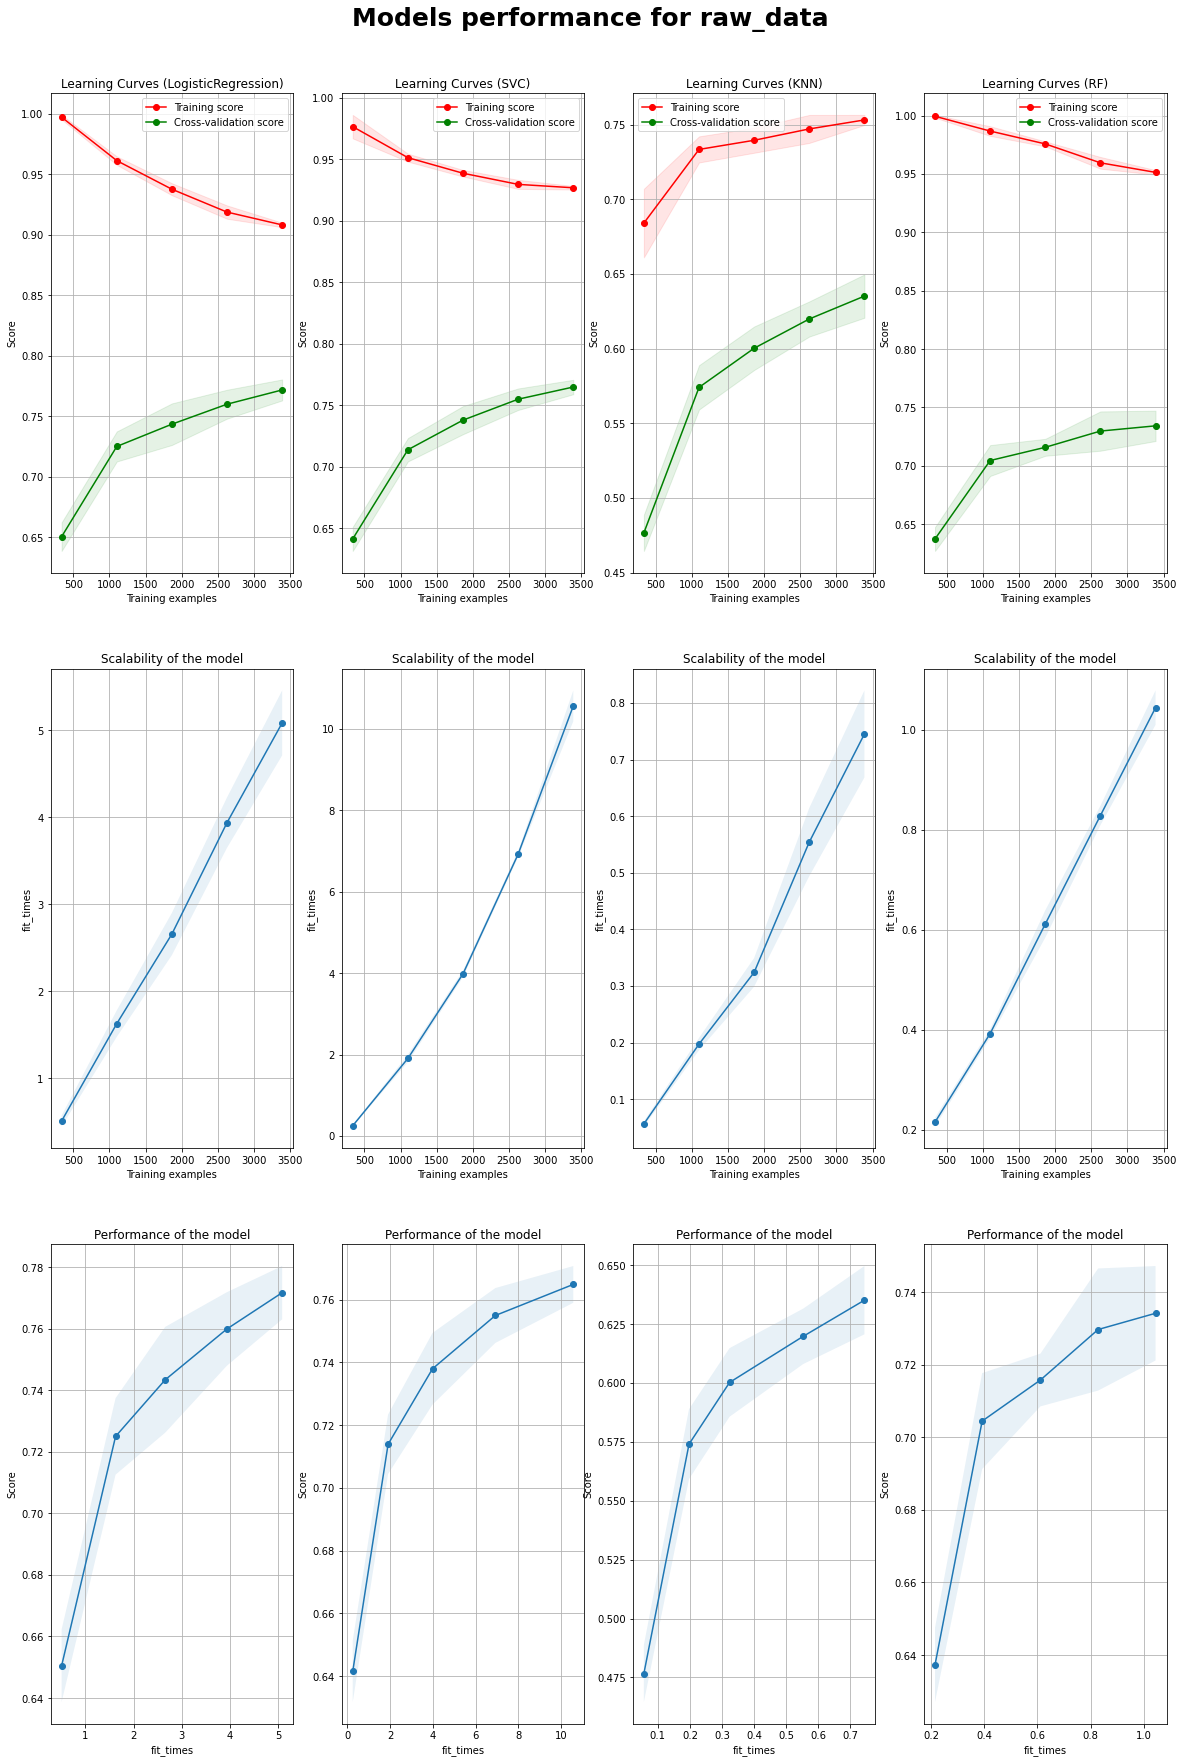

In [15]:
#This code is modified based on https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 4, figsize=(20, 30))

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

plot_learning_curve(clf_LogisticRegression, "Learning Curves (LogisticRegression)", X, y, axes=axes[:, 0],
                    cv=cv, n_jobs=4)

plot_learning_curve(clf_SVC,"Learning Curves (SVC)", X, y, axes=axes[:, 1],
                    cv=cv, n_jobs=4)

plot_learning_curve(clf_KNN, "Learning Curves (KNN)", X, y, axes=axes[:, 2],
                    cv=cv, n_jobs=4)

plot_learning_curve(clf_RF, "Learning Curves (RF)", X, y, axes=axes[:, 3],
                    cv=cv, n_jobs=4)

fig.suptitle('Models performance for raw_data',fontweight ="bold",fontsize=25,y=0.92)
plt.savefig('fig_raw_data.png')

In [20]:
#Using Max Voting for the classification Model integration
from sklearn.ensemble import VotingClassifier
model1 = clf_LogisticRegression
model2 = clf_SVC
model3 = clf_KNN
model4 = clf_RF
model = VotingClassifier(estimators=[('lr', model1), ('svc', model2),('knn', model3),('rf',model4)], voting='soft')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7735849056603774

In [21]:
#Using Max Voting for the classification Model integration
from sklearn.ensemble import VotingClassifier
model1 = clf_LogisticRegression
model2 = clf_SVC
model3 = clf_KNN
model4 = clf_RF
model = VotingClassifier(estimators=[('lr', model1), ('svc', model2),('knn', model3),('rf',model4)], voting='hard')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7523584905660378

In [22]:
#Using sklearn Stacking for the classification Model integration
from sklearn.ensemble import StackingClassifier
estimators = [
            ('rf', clf_RF),
            ('knn', clf_KNN),
            ('svc', clf_SVC)
 ]
clf = StackingClassifier(estimators=estimators, final_estimator=clf_LogisticRegression)
clf.fit(X_train, y_train).score(X_test, y_test)

0.7594339622641509